#### SUMMARY :
Here I have Used sentiment analysis technique to predict our catagories.</br>
    In this process I have done visualizations which give bussiness insights to the company and futuer planning of the products.<br>
    I have used TfidfVectorizer clsass of sklearn's feature_extraction.text sub-module to transform text data which is 'review description' attribute of our dataset to feature vectors. Due to hardware inefficiency I could not perform bigram features over the attribute, it may cause the decrease in accuracy.<br>
    I use sklearn.feature_selection.chi2 to find the terms that are the most correlated with each of the products.<br><b>The naive_bayes multinomia classifier is used in this model to preict. The 26 types of variety is converted into numeric form and feeded to the model to train and predict.
    <br>
    Then new variety is predicted for test data given and convert that dataframe to csv file.

In [1]:
# jay jagannath
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from wordcloud import WordCloud
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [2]:
data = pd.read_csv('./Data/train.csv')

In [3]:
data.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


In [4]:
data.isnull().sum()

user_name             19393
country                  35
review_title              0
review_description        0
designation           23647
points                    0
price                  5569
province                 35
region_1              12754
region_2              46708
winery                    0
variety                   0
dtype: int64

In [6]:
data['review_description'] = data['review_description'].astype(str)

In [7]:
words = []
for row in range(len(data.variety)):
    words.append(data.iloc[row, -1])
st = str(words)


In [8]:
my_stop_words = set(ENGLISH_STOP_WORDS)
my_stop_words.update([ ',', '[', ',' ], 'the', 'this', 'is')

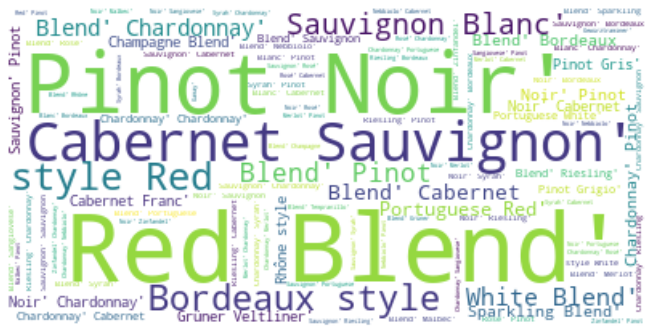

In [9]:
clouword = WordCloud(background_color='white', stopwords=my_stop_words).generate(st)
plt.imshow(clouword, interpolation='bilinear')
plt.axis('off')
fig = plt.gcf()
fig.set_size_inches(11.5, 6.5)
plt.show()

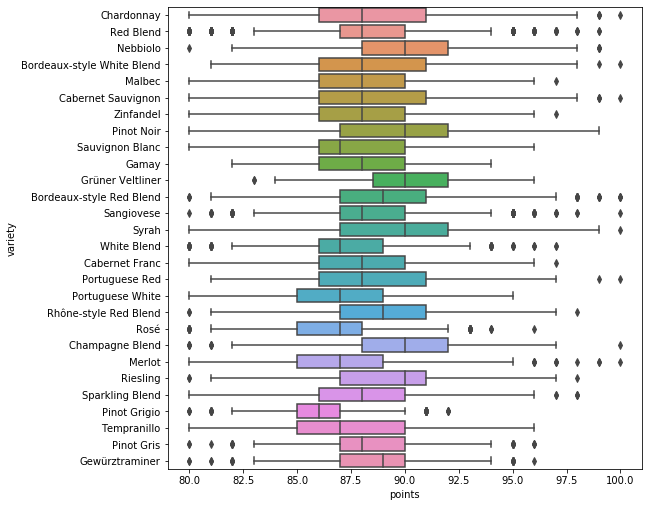

In [10]:
fig = plt.gcf()
fig.set_size_inches(8.5, 8.5)
sns.boxplot(y = 'variety',x = 'points', data = data )

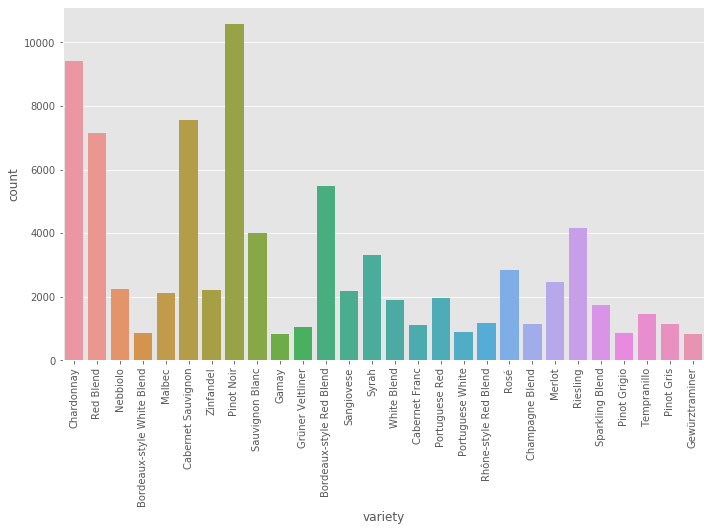

In [11]:
plt.style.use('ggplot')
plt.xticks(rotation=90)
fig = plt.gcf()
fig.set_size_inches(11.5, 6.5)
sns.countplot(x = 'variety', data = data)

In [12]:
# From the avobe graph we can take into consideration about which producct is our key product and in which we should focus on 

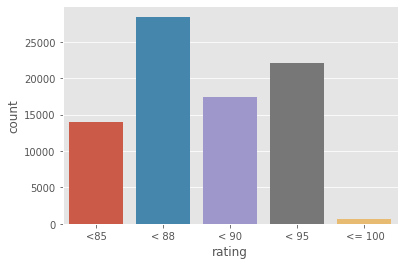

In [13]:
bins = [0, 85, 88, 90, 95,100]
group_name = ['<85', '< 88', '< 90', '< 95', ' <= 100']
data['rating'] = pd.cut(data['points'], bins = bins, labels = group_name)

sns.countplot(data['rating'],  )

In [14]:
data['variety'].value_counts()

Pinot Noir                    10587
Chardonnay                     9403
Cabernet Sauvignon             7552
Red Blend                      7166
Bordeaux-style Red Blend       5497
Riesling                       4148
Sauvignon Blanc                4011
Syrah                          3316
Rosé                           2831
Merlot                         2471
Nebbiolo                       2242
Zinfandel                      2209
Sangiovese                     2165
Malbec                         2119
Portuguese Red                 1969
White Blend                    1896
Sparkling Blend                1739
Tempranillo                    1448
Rhône-style Red Blend          1182
Pinot Gris                     1148
Champagne Blend                1133
Cabernet Franc                 1095
Grüner Veltliner               1055
Portuguese White                896
Pinot Grigio                    873
Bordeaux-style White Blend      850
Gewürztraminer                  840
Gamay                       

In [15]:
data['price'].describe()

count    77088.000000
mean        36.922232
std         43.698346
min          4.000000
25%         18.000000
50%         27.000000
75%         45.000000
max       3300.000000
Name: price, dtype: float64

In [16]:
data['category_id'] = data['variety'].factorize()[0]

In [17]:
category_id_df = data[['variety', 'category_id']].drop_duplicates().sort_values('category_id')

In [18]:
from io import StringIO
col = ['variety', 'review_description']
data = data[col]
data = data[pd.notnull(data['review_description'])]
data.columns = ['variety', 'review_description']
data['category_id'] = data['variety'].factorize()[0]
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'variety']].values)
data.head()


,variety,review_description,category_id
0,Chardonnay,"Classic Chardonnay aromas of apple, pear and h...",0
1,Red Blend,This wine is near equal parts Syrah and Merlot...,1
2,Nebbiolo,Barolo Conca opens with inky dark concentratio...,2
3,Bordeaux-style White Blend,It's impressive what a small addition of Sauvi...,3
4,Malbec,"This ripe, sweet wine is rich and full of drie...",4


In [19]:
# data.drop_duplicates(inplace= True)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 1), stop_words='english')
features = tfidf.fit_transform(data.review_description).toarray()
labels = data.category_id
features.shape

(82657, 10000)

In [18]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]]
  print("# '{}':".format(Product))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))

# 'Bordeaux-style Red Blend':
  . Most correlated unigrams:
. bordeaux
. sample
# 'Bordeaux-style White Blend':
  . Most correlated unigrams:
. sémillon
. botrytis
# 'Cabernet Franc':
  . Most correlated unigrams:
. francs
. franc
# 'Cabernet Sauvignon':
  . Most correlated unigrams:
. cassis
. cab
# 'Champagne Blend':
  . Most correlated unigrams:
. dosage
. champagne
# 'Chardonnay':
  . Most correlated unigrams:
. buttered
. chardonnay
# 'Gamay':
  . Most correlated unigrams:
. morgon
. beaujolais
# 'Gewürztraminer':
  . Most correlated unigrams:
. lychee
. gewürztraminer
# 'Grüner Veltliner':
  . Most correlated unigrams:
. screwcap
. grüner
# 'Malbec':
  . Most correlated unigrams:
. malbecs
. malbec
# 'Merlot':
  . Most correlated unigrams:
. merlots
. merlot
# 'Nebbiolo':
  . Most correlated unigrams:
. nebbiolo
. barolo
# 'Pinot Grigio':
  . Most correlated unigrams:
. grigios
. grigio
# 'Pinot Gris':
  . Most correlated unigrams:
. pear
. gris
# 'Pinot Noir':
  . Most correlate

In [22]:
data.head()

,variety,review_description,category_id
0,Chardonnay,"Classic Chardonnay aromas of apple, pear and h...",0
1,Red Blend,This wine is near equal parts Syrah and Merlot...,1
2,Nebbiolo,Barolo Conca opens with inky dark concentratio...,2
3,Bordeaux-style White Blend,It's impressive what a small addition of Sauvi...,3
4,Malbec,"This ripe, sweet wine is rich and full of drie...",4


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(data['review_description'], data['variety'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [24]:
print(clf.predict(count_vect.transform(["'This wine is near equal parts Syrah and Merlot with the balance Cabernet Sauvignon. Aromas of blue fruit, vanilla, cherry and herb lead to full-bodied pit-fruit flavors that bring a sense of deliciousness that is hard to resist.'"])))

['Red Blend']


In [25]:
y_pred = clf.predict(count_vect.transform(X_test))

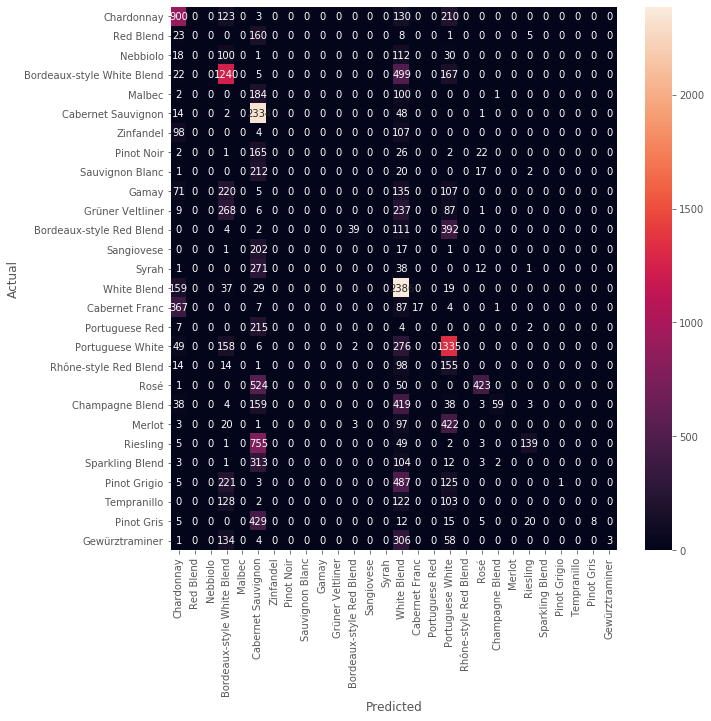

In [26]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.variety.values, yticklabels=category_id_df.variety.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [27]:
test_data = pd.read_csv('./Data/test.csv')

In [28]:
print('Jay Jagannath')

Jay Jagannath


In [29]:
test_data.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery
0,@paulgwine,US,Boedecker Cellars 2011 Athena Pinot Noir (Will...,Nicely differentiated from the companion Stewa...,Athena,88,35.0,Oregon,Willamette Valley,Willamette Valley,Boedecker Cellars
1,@wineschach,Argentina,Mendoza Vineyards 2012 Gran Reserva by Richard...,"Charred, smoky, herbal aromas of blackberry tr...",Gran Reserva by Richard Bonvin,90,60.0,Mendoza Province,Mendoza,NaN,Mendoza Vineyards
2,@vboone,US,Prime 2013 Chardonnay (Coombsville),"Slightly sour and funky in earth, this is a re...",NaN,87,38.0,California,Coombsville,Napa,Prime
3,@wineschach,Argentina,Bodega Cuarto Dominio 2012 Chento Vineyard Sel...,"This concentrated, midnight-black Malbec deliv...",Chento Vineyard Selection,91,20.0,Mendoza Province,Mendoza,NaN,Bodega Cuarto Dominio
4,@kerinokeefe,Italy,SassodiSole 2012 Brunello di Montalcino,"Earthy aromas suggesting grilled porcini, leat...",NaN,90,49.0,Tuscany,Brunello di Montalcino,NaN,SassodiSole


In [30]:
test_data['predicted_variety'] = clf.predict(count_vect.transform(test_data.iloc[:, 3].astype(str)))

In [31]:
test_data

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,predicted_variety
0,@paulgwine,US,Boedecker Cellars 2011 Athena Pinot Noir (Will...,Nicely differentiated from the companion Stewa...,Athena,88,35.0,Oregon,Willamette Valley,Willamette Valley,Boedecker Cellars,Pinot Noir
1,@wineschach,Argentina,Mendoza Vineyards 2012 Gran Reserva by Richard...,"Charred, smoky, herbal aromas of blackberry tr...",Gran Reserva by Richard Bonvin,90,60.0,Mendoza Province,Mendoza,NaN,Mendoza Vineyards,Red Blend
2,@vboone,US,Prime 2013 Chardonnay (Coombsville),"Slightly sour and funky in earth, this is a re...",NaN,87,38.0,California,Coombsville,Napa,Prime,Chardonnay
3,@wineschach,Argentina,Bodega Cuarto Dominio 2012 Chento Vineyard Sel...,"This concentrated, midnight-black Malbec deliv...",Chento Vineyard Selection,91,20.0,Mendoza Province,Mendoza,NaN,Bodega Cuarto Dominio,Red Blend
4,@kerinokeefe,Italy,SassodiSole 2012 Brunello di Montalcino,"Earthy aromas suggesting grilled porcini, leat...",NaN,90,49.0,Tuscany,Brunello di Montalcino,NaN,SassodiSole,Red Blend
...,...,...,...,...,...,...,...,...,...,...,...,...
20660,@gordone_cellars,US,Yorkville Cellars 2013 Rennie Vineyard Caberne...,"Clearly focused and fruit-driven, this wine ha...",Rennie Vineyard,91,34.0,California,Yorkville Highlands,North Coast,Yorkville Cellars,Pinot Noir
20661,@laurbuzz,France,Château Ribaute 2015 Senhal d'Aric Rosé (Corbi...,Herbal tones of bay and rosemary are upfront o...,Senhal d'Aric,84,20.0,Languedoc-Roussillon,Corbières,NaN,Château Ribaute,Pinot Noir
20662,@mattkettmann,US,Daou 2014 Reserve Cabernet Sauvignon (Paso Rob...,"Mocha cream, pencil shaving and dried herb aro...",Reserve,94,85.0,California,Paso Robles,Central Coast,Daou,Pinot Noir
20663,@wineschach,Spain,Peñascal 2011 Tempranillo Rosé (Vino de la Tie...,Loud citrus and berry aromas precede an overlo...,Tempranillo,80,9.0,Northern Spain,Vino de la Tierra de Castilla y León,NaN,Peñascal,Red Blend


The prediction on test data is completed.

In [32]:
test_data.to_csv('predicted_test.csv')